# Lab 7: The Framingham Heart Study

As usual, run the cell below to prepare the lab.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. Cardiovascular disease is one of the leading causes of death in the United States, as you will see in tomorrow’s homework. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this lab, we'll investigate some of its key findings about diet, cholesterol, and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

In [2]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study: this is because we are excluding subjects who already had heart disease as well as subjects with missing data.

### Section 1: Diabetes and the population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the proportion of the population who have it) in the U.S. around this time was 0.0093. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference between the study prevalence and population prevalence is due to random chance in the selection of the participants).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study?

<!--
BEGIN QUESTION
name: q2_1_1
manual: false
-->

In [3]:
observed_diabetes_distance = framingham.where("DIABETES", are.equal_to(1)).num_rows/framingham.num_rows
observed_diabetes_distance

0.02732951587714732

**Question 2**: The array `diabetes_proportions` contains the proportions of the population without and with diabetes. Define the function `diabetes_statistic`, which should return exactly one simulated statistic under the null hypothesis. Remember that our statistic is the absolute distance between the observed prevalence and the true population prevalence.

<!--
BEGIN QUESTION
name: q2_1_2
manual: false
-->

In [4]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_statistic():
    sample = framingham.sample(with_replacement=True)
    sample_prevalence = sample.where("DIABETES", are.equal_to(1)).num_rows/sample.num_rows
    simulated_stat = abs(sample_prevalence - 0.0093)
    return simulated_stat

**Question 3**: Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q2_1_3
manual: false
-->

In [12]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    simulated_stat = diabetes_statistic()
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, simulated_stat)
    
diabetes_simulated_stats

array([0.01985148, 0.02063233, 0.02219401, ..., 0.01985148, 0.01802952,
       0.01907064])

**Question 4**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*Check the result of this cell with a staff member and explain what this histogram displays.*

<!--
BEGIN QUESTION
name: q2_1_4
manual: true
-->
<!-- EXPORT TO PDF -->

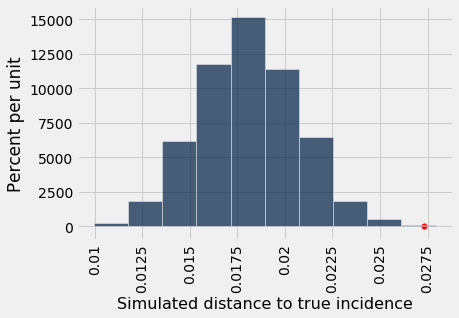

In [13]:
Table().with_column('Simulated distance to true incidence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red', s=30);

**Question 5**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis?

<!--
BEGIN QUESTION
name: q2_1_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Yes.*

**Question 6**: Why might there be a difference between the population and the sample from the Framingham Study? Assign the name `framingham_diabetes_explanations` to an array of the following explanations that **are possible and consistent** with the observed data and hypothesis test results.

1. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
2. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.

<!--
BEGIN QUESTION
name: q2_1_6
manual: false
-->

In [14]:
framingham_diabetes_possibilities = make_array(1,3)
framingham_diabetes_possibilities

array([1, 3])

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting all the data from the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease. [These sections](https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html) of the textbook should be helpful for the rest of the lab if you run into difficulties.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the cholesterol levels of people who get heart disease come from the same distribution as the cholesterol levels of people who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.



**Question 1:** From the provided Null and Alternative Hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent? Assign the variable `ab_reasonable` to `True` if it seems reasonable and `False` otherwise.

<!--
BEGIN QUESTION
name: q2_2_1
manual: false
-->

In [15]:
ab_reasonable = True
ab_reasonable

True

To test our hypothesis, we’ll generally want to use a test statistic where larger values of the test statistic will point towards the alternative. In this case, since the alternative states that the cholesterol levels of people who get heart disease are **higher** on average than those who do not, we should use a statistic that maintains the directionality implied in the alternative. Let’s use the **difference between the average cholesterol levels of those who get heart disease and those who don’t.**

**Question 2**: Write a function that returns the test statistic described above. It should take a table with two columns, `TOTCHOL` and `ANYCHD`. 

*Hint: You will need to use the `.group` function to calculate your test statistic.*

<!--
BEGIN QUESTION
name: q2_2_2
manual: false
-->

In [18]:
def compute_framingham_test_statistic(tbl):
    table = tbl.select("TOTCHOL","ANYCHD")
    cholH = np.mean(table.where("ANYCHD", 1).column("TOTCHOL")) #with heart disease
    cholO = np.mean(table.where("ANYCHD", 0).column("ANYCHD")) #without heart disease
    return (cholH - cholO)

**Question 3**: Use the function you defined above to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

<!--
BEGIN QUESTION
name: q2_2_3
manual: false
-->

In [19]:
framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

249.48218029350105

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 4**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

<!--
BEGIN QUESTION
name: q2_2_4
manual: false
-->

In [22]:
def simulate_framingham_null():
    shuffled_column = framingham.select("TOTCHOL","ANYCHD")
    original_with_shuffled_col = shuffled_column.sample(with_replacement = True)
    simulated_test_stat = np.mean(original_with_shuffled_col.where("ANYCHD", 1).column("TOTCHOL")) - np.mean(original_with_shuffled_col.where("ANYCHD", 0).column("ANYCHD"))
    return simulated_test_stat 

In [23]:
# Run your function once to make sure that it works.
simulate_framingham_null()

250.16193480546792

**Question 5**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array framingham_simulated_stats.

*Hint*: You should use the function you wrote above in Question 4.

*Note*: Warning: running your code might take a few minutes!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

<!--
BEGIN QUESTION
name: q2_2_5
manual: false
-->

In [24]:
framingham_simulated_stats = make_array()

for i in np.arange(1000):
    simulate = simulate_framingham_null()
    framingham_simulated_stats = np.append(framingham_simulated_stats, simulate)

**Question 6:** The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. As before, check the result of this cell with a staff member and explain what this histogram displays. 

<!--
BEGIN QUESTION
name: q2_2_6
-->

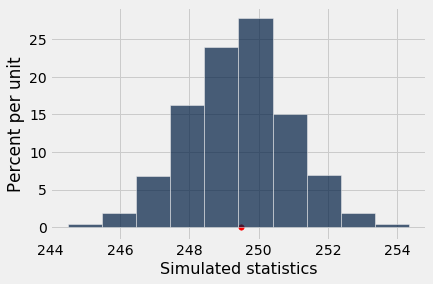

In [25]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30);

**Question 7**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

<!--
BEGIN QUESTION
name: q2_2_7
manual: false
-->

In [26]:
framingham_p_value = np.count_nonzero(framingham_simulated_stats >= framingham_observed_statistic)
framingham_p_value

496

**Question 8**: Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Discuss with a neighbor and give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.

<!--
BEGIN QUESTION
name: q2_2_8
-->

*Because high cholesterol is often caused by bad habits and acitvities that might also cause heart disease, so it is not enough to prove that high cholesterol causes heart disease.*

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

### Further reading

If you're interested in learning more, you can check out this article:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)